# Example Prediction Temperature Working on 12th Month To Predict The temperature of Weekly Nasa Dataset

In [1]:
import pandas as pd
data = pd.read_csv('Month12.csv')
data.columns

Index(['ALLSKY_KT', 'WS2M', 'T2M', 'PS', 'WS10M', 'QV2M', 'RH2M'], dtype='object')

In [2]:
data.shape

(1179, 7)

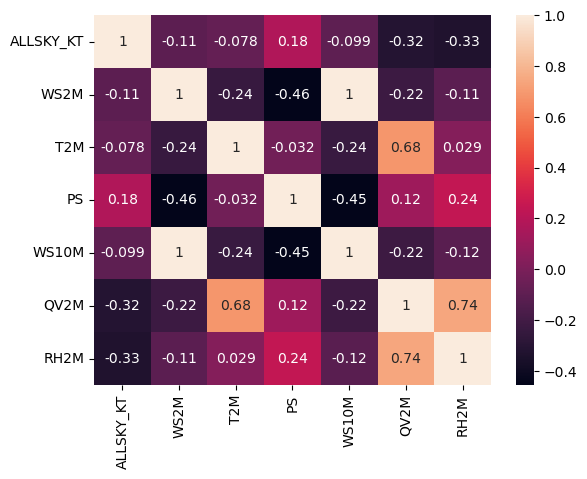

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [4]:
data.head(5)

,ALLSKY_KT,WS2M,T2M,PS,WS10M,QV2M,RH2M
0,-0.020677,-0.943111,6.471681,0.048809,-1.276172,1.832841,-13.236381
1,0.129323,-0.283112,7.141681,0.048809,-0.416172,2.382841,-10.176381
2,0.149323,0.236889,7.501681,0.048809,0.233828,3.052841,-5.176381
3,0.079323,0.016889,8.241681,-0.051191,-0.186172,3.232841,-5.796381
4,0.109323,1.526889,6.491681,-0.291191,1.923828,2.082841,-10.356381


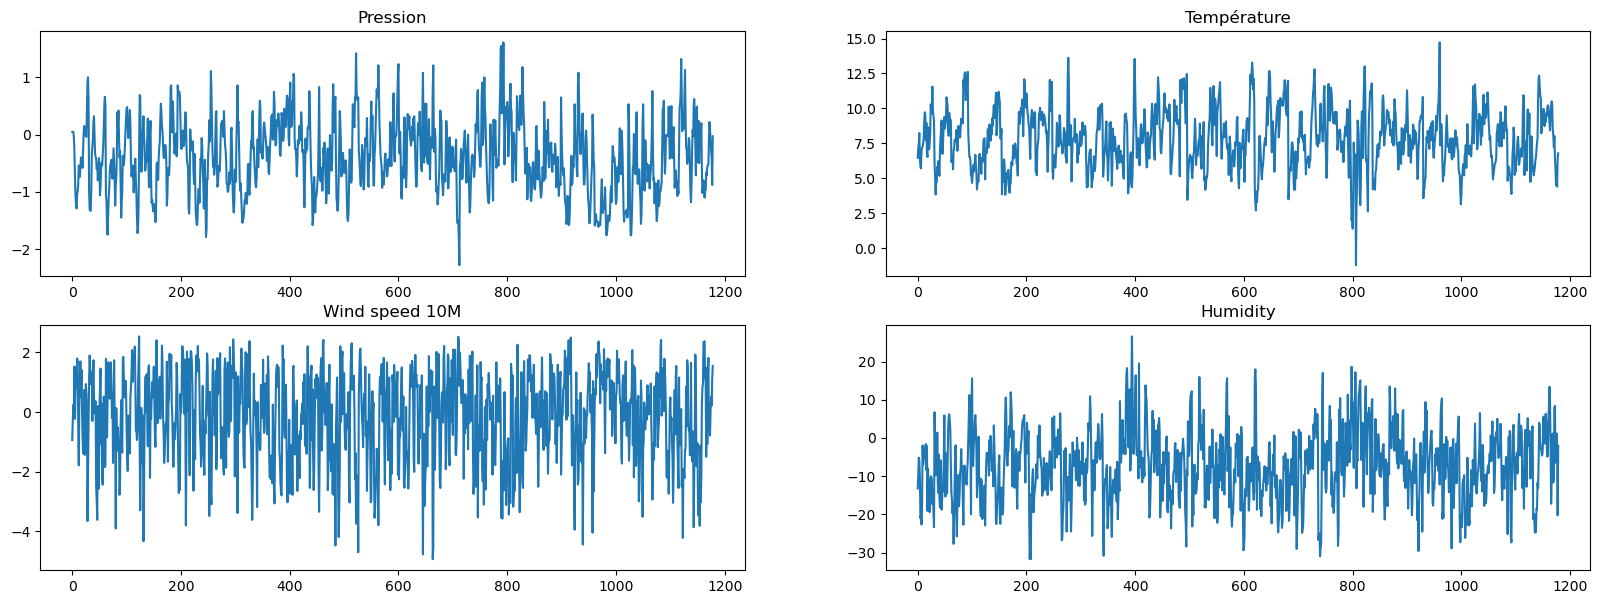

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,7))
# Évolution de la pression
ax1 = fig.add_subplot(221)
plt.plot(data['PS'])
ax1.title.set_text('Pression')
# Évolution de la température
ax2 = fig.add_subplot(222)
plt.plot(data['T2M'])
ax2.title.set_text('Température')
# Évolution de la vont
ax3 = fig.add_subplot(223)
plt.plot(data['WS2M'])
ax3.title.set_text('Wind speed 10M')
# Évolution du déficit de himidité de vapeur
ax4 = fig.add_subplot(224)
plt.plot(data['RH2M'])
ax4.title.set_text('Humidity')
# Evolution de radation
#ax5 = fig.add_subplot(225)
#plt.plot(data['Radiation'])
#ax5.title.set_text('Radation')

plt.show()

In [6]:
split_fraction = 0.80
split_idx = int(split_fraction * len(data))
# Train: on conserve les 80% premières lignes
train_data = data.loc[0:split_idx-1].values
# Test: on conserve les 20% dernières lignes
val_data = data.loc[split_idx:].values
print(f"Jeu d'apprentissage : {train_data.shape}, jeu d'évaluation : {val_data.shape}")

Jeu d'apprentissage : (943, 7), jeu d'évaluation : (236, 7)


### Train The NN and obtimise with descente de gradient

In [7]:
# Importation 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib as plt

In [8]:
# Création du jeu d'entraînement
sampling_rate = 1 # Fréquence d'échantillonnage
sequence_length = 120  # Longueur de la séquence
batch_size = 256 # Taille de batch

# Création du jeu d'entraînement: contient Temperature, Pressure, Humidity, WindSpeed, day length
X_train = tf.keras.utils.timeseries_dataset_from_array(
    data=train_data[:, (0,1,3,4,5,6)],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

y_train = tf.keras.utils.timeseries_dataset_from_array(
    data=train_data[:, 2],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

dataset_train = tf.data.Dataset.zip((X_train, y_train))
# Création du jeu d'évaluation

X_val = tf.keras.utils.timeseries_dataset_from_array(
    data=val_data[:, (0,1,3,4,5,6)],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

y_val = tf.keras.utils.timeseries_dataset_from_array(
    data=val_data[:, 2],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

dataset_val = tf.data.Dataset.zip((X_val, y_val))

# Training The RNN To Predict Third Month

In [9]:
# from tensorflow import keras

dimension = train_data.shape[1]-1
inputs = keras.layers.Input(shape=(sequence_length, dimension))
gru_out = keras.layers.GRU(dimension, return_sequences=True)(inputs)
dense_out = keras.layers.Dense(dimension, activation='relu')(gru_out)
outputs = keras.layers.Dense(1)(dense_out)

model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
learning_rate = 0.001
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 6)]          0         
                                                                 
 gru (GRU)                   (None, 120, 6)            252       
                                                                 
 dense (Dense)               (None, 120, 6)            42        
                                                                 
 dense_1 (Dense)             (None, 120, 1)            7         
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [11]:
epochs = 100
model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
)

Epoch 1/100
4/4 [==============================] - 4s 289ms/step - loss: 62.1243 - val_loss: 57.9881
Epoch 2/100
4/4 [==============================] - 0s 97ms/step - loss: 60.9311 - val_loss: 56.7726
Epoch 3/100
4/4 [==============================] - 0s 92ms/step - loss: 59.7280 - val_loss: 55.5420
Epoch 4/100
4/4 [==============================] - 0s 102ms/step - loss: 58.5233 - val_loss: 54.3219
Epoch 5/100
4/4 [==============================] - 0s 111ms/step - loss: 57.3192 - val_loss: 53.1355
Epoch 6/100
4/4 [==============================] - 0s 107ms/step - loss: 56.1284 - val_loss: 51.9722
Epoch 7/100
4/4 [==============================] - 0s 107ms/step - loss: 54.9663 - val_loss: 50.8438
Epoch 8/100
4/4 [==============================] - 0s 93ms/step - loss: 53.8395 - val_loss: 49.7540
Epoch 9/100
4/4 [==============================] - 0s 95ms/step - loss: 52.7471 - val_loss: 48.7140
Epoch 10/100
4/4 [==============================] - 0s 110ms/step - loss: 51.6881 - val_loss: 4

4/4 [==============================] - 0s 95ms/step - loss: 4.6107 - val_loss: 3.5993
Epoch 83/100
4/4 [==============================] - 0s 94ms/step - loss: 4.5939 - val_loss: 3.5941
Epoch 84/100
4/4 [==============================] - 0s 99ms/step - loss: 4.5770 - val_loss: 3.5886
Epoch 85/100
4/4 [==============================] - 0s 94ms/step - loss: 4.5602 - val_loss: 3.5827
Epoch 86/100
4/4 [==============================] - 0s 90ms/step - loss: 4.5432 - val_loss: 3.5765
Epoch 87/100
4/4 [==============================] - 0s 94ms/step - loss: 4.5261 - val_loss: 3.5699
Epoch 88/100
4/4 [==============================] - 0s 94ms/step - loss: 4.5087 - val_loss: 3.5630
Epoch 89/100
4/4 [==============================] - 0s 94ms/step - loss: 4.4909 - val_loss: 3.5558
Epoch 90/100
4/4 [==============================] - 0s 93ms/step - loss: 4.4728 - val_loss: 3.5483
Epoch 91/100
4/4 [==============================] - 0s 95ms/step - loss: 4.4543 - val_loss: 3.5405
Epoch 92/100
4/4 [=====

In [12]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import scatter
def show_plot(predicted_data, true_data):
    plt.title('Prédiction synchrone')
    plt.plot(predicted_data, "rx", label="Temperature prédite")
    plt.plot(true_data, ".-", label="Vraie Temperature")
    plt.legend()
    plt.xlabel("Pas de temps")
    plt.show()
    return

4/4 [==============================] - 1s 14ms/step


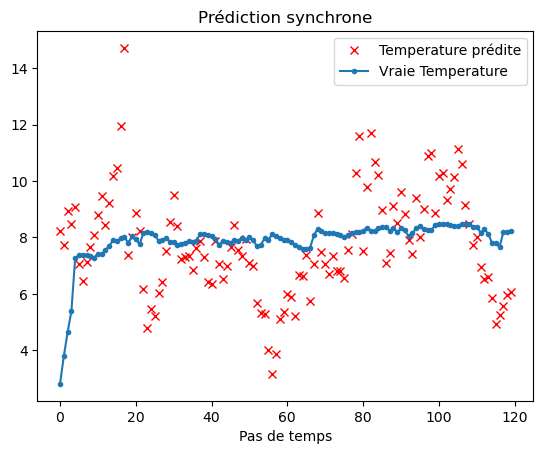

In [13]:
for x, y in dataset_val.take(3):
     show_plot(y[0].numpy(), model.predict(x)[0])

In [14]:
mean_absolute_error = tf.keras.losses.MeanAbsoluteError()
error = 0

for x, y in dataset_val:
    y_pred = model(x)
    error += mean_absolute_error(y, y_pred).numpy()

print(f"Erreur absolue moyenne : {error/len(dataset_val):.5f}")


Erreur absolue moyenne : 1.51685


## Prédiction de la température future

In [15]:
past_length = 120
future_step = 1

label_start = past_length + future_step  # Début de la séquence des labels
label_end = label_start + split_idx  # Fin de la séquence des labels

x_train = train_data
y_train = data[label_start:label_end][['T2M']]

x_end = len(val_data) - past_length - future_step # Fin de la séquence des données d'entrées en validation

label_start = split_idx + past_length + future_step # Début de la séquence des labels en validation
x_val = val_data[:x_end]
y_val = data[label_start:][['T2M']]

In [16]:
batch_size = 256
step_size = 1 # Facteur d'échantillonnage
sequence_length = int(past_length / step_size)

dataset_train = tf.keras.utils.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step_size,
    batch_size=batch_size,
)

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step_size,
    batch_size=batch_size,
)

In [17]:
learning_rate = 0.001

input_dim = train_data.shape[1]
hidden_dim = 32
inputs = keras.layers.Input(shape=(sequence_length, input_dim))
gru_out = keras.layers.GRU(hidden_dim)(inputs)
dense_out = keras.layers.Dense(hidden_dim, activation='relu')(gru_out)
outputs = keras.layers.Dense(1)(dense_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 gru_1 (GRU)                 (None, 32)                3936      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs = 50

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
)

Epoch 1/50
4/4 [==============================] - 3s 123ms/step - loss: 72.7825
Epoch 2/50
4/4 [==============================] - 1s 118ms/step - loss: 66.3169
Epoch 3/50
4/4 [==============================] - 0s 112ms/step - loss: 60.8085
Epoch 4/50
4/4 [==============================] - 0s 118ms/step - loss: 56.0175
Epoch 5/50
4/4 [==============================] - 0s 116ms/step - loss: 51.7159
Epoch 6/50
4/4 [==============================] - 1s 121ms/step - loss: 47.7462
Epoch 7/50
4/4 [==============================] - 1s 118ms/step - loss: 44.0033
Epoch 8/50
4/4 [==============================] - 0s 116ms/step - loss: 40.2931
Epoch 9/50
4/4 [==============================] - 1s 118ms/step - loss: 36.4081
Epoch 10/50
4/4 [==============================] - 0s 116ms/step - loss: 32.3627
Epoch 11/50
4/4 [==============================] - 0s 114ms/step - loss: 28.2710
Epoch 12/50
4/4 [==============================] - 0s 118ms/step - loss: 24.2246
Epoch 13/50
4/4 [====================

In [19]:
def show_plot(sequence, prediction, ground_truth, delta=future_step/step_size, title=None):
    plt.title(title)
    plt.plot(sequence.flatten(), ".-", label="Temperature")
    plt.plot(len(sequence) + delta, prediction, "go", label="Prédiction")
    plt.plot(len(sequence) + delta, ground_truth, "rx", label="Vraie Temperature")
    plt.legend()
    plt.xlim(-1, len(sequence) + delta + 3)
    plt.xlabel("Pas de temps")
    plt.show()

In [22]:
for x, y in dataset_val.take(5):
    show_plot(x[0][:, 1].numpy(), model.predict(x)[0], y[0].numpy(), title="Prédiction de la Temperature")

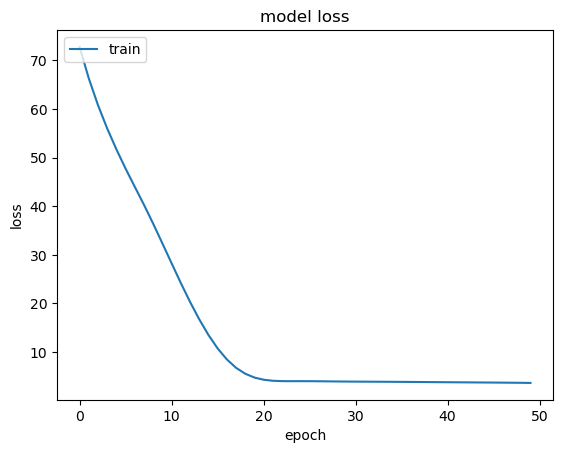

In [23]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()